In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

In [2]:
%matplotlib notebook

In [3]:
import matplotlib.colors as mcolors
colors = list(mcolors.XKCD_COLORS.keys())[0:10]

In [7]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

In [8]:
max_len = len(x)

In [9]:
def pad_array(x, l, r):
    r_pad = max_len - r
    return np.pad(x, (l, r_pad), constant_values = (None, None))

In [10]:
x_beg

0

In [11]:
len(y[x_beg:(x_beg + i * 10)])

10

In [26]:
type(x[0])

numpy.float64

In [27]:
type(x)

numpy.ndarray

In [12]:
# plt.figure()
data = []
x_beg = 0
for i in range(1,11):
    rpad = (x_beg + i * 10)
    data.append([
#         x[x_beg:(x_beg + i * 10)],
                 pad_array(x[x_beg:(x_beg + 10)], x_beg, x_beg + 10),
#              y[x_beg:(x_beg + i * 10)],
                pad_array(y[x_beg:(x_beg + 10)], x_beg, x_beg + 10),
             i])
    x_beg +=  10
    
# plt.legend(loc='best', fontsize=15)
# # plt.savefig('test2.jpg')
# plt.show()    

In [15]:
import matplotlib.colors as mcolors
colors = list(mcolors.XKCD_COLORS.keys())[0:10]

<IPython.core.display.Javascript object>


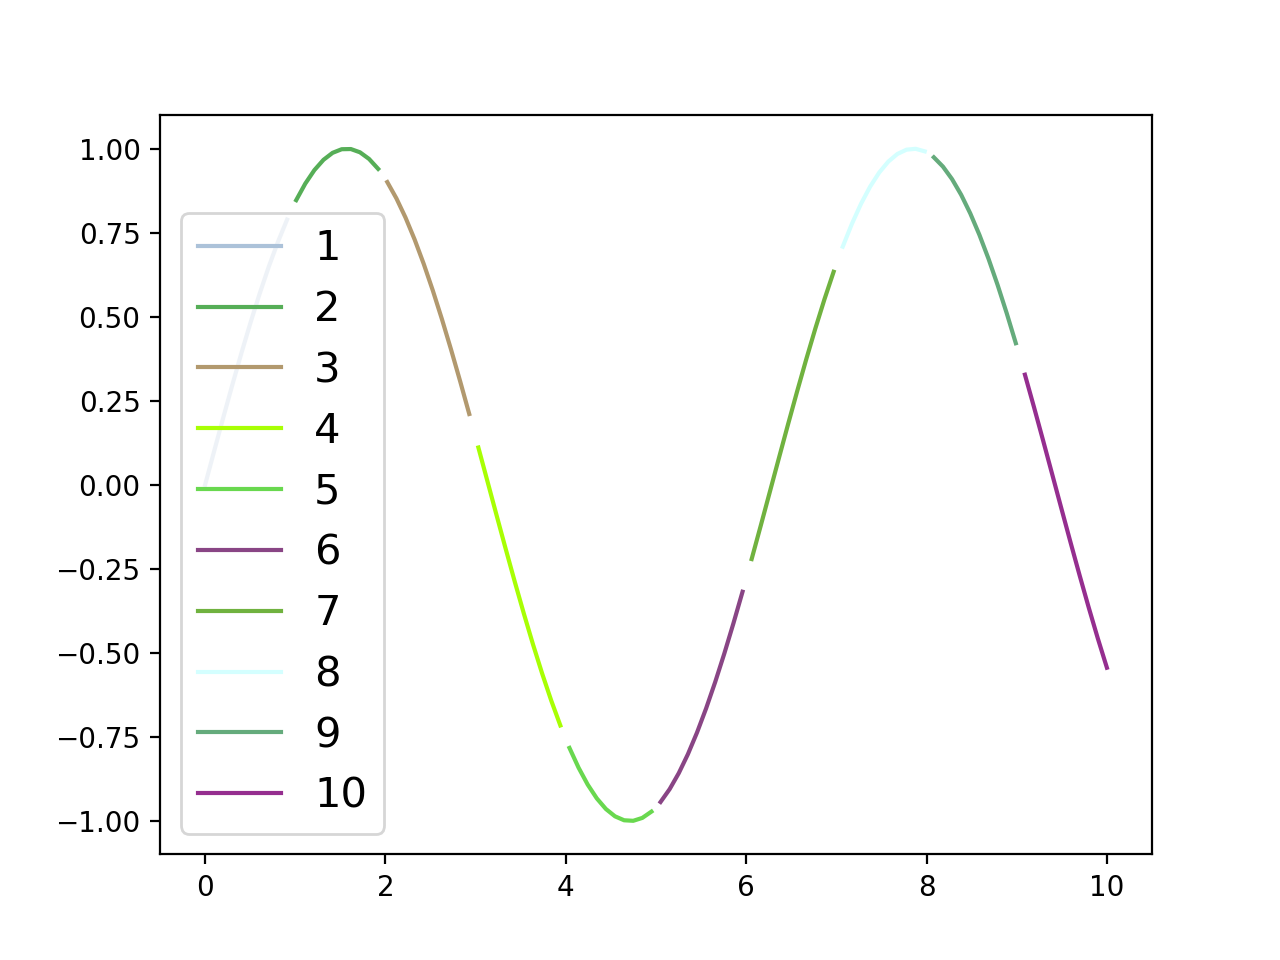

In [16]:
fig = plt.figure()
for i, d in enumerate(data):
    plt.plot(d[0], d[1], label = d[2], color = colors[i])

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


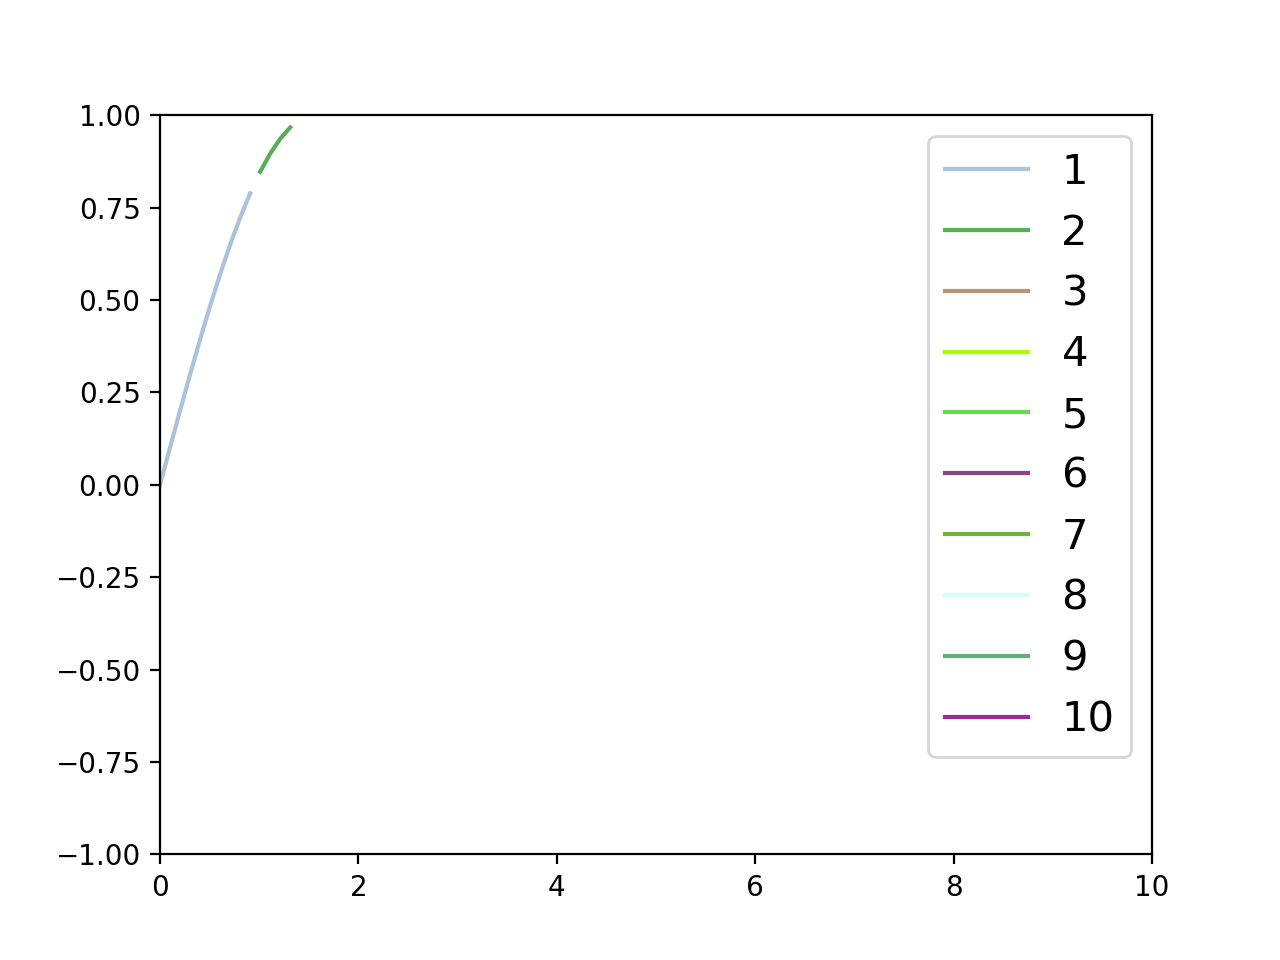

In [36]:
## Animate above plot!
N = len(data)

fig = plt.figure()
ax = plt.axes(xlim=(0,10), ylim=(-1, 1))

lines = [plt.plot([], [])[0] for _ in range(N)]

def update(num):
    for j in range(N):
        lines[j].set_data(data[j][0][:num], data[j][1][:num] )
        lines[j].set_color(mcolors.XKCD_COLORS[colors[j]])
        lines[j].set_label(data[j][2])
        plt.legend(loc='best', fontsize=15)
    return line,

anim = ani.FuncAnimation(fig, update, 50, interval=100, blit=True)
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
# plt.legend(loc='best', fontsize=15)

plt.show()

<IPython.core.display.Javascript object>


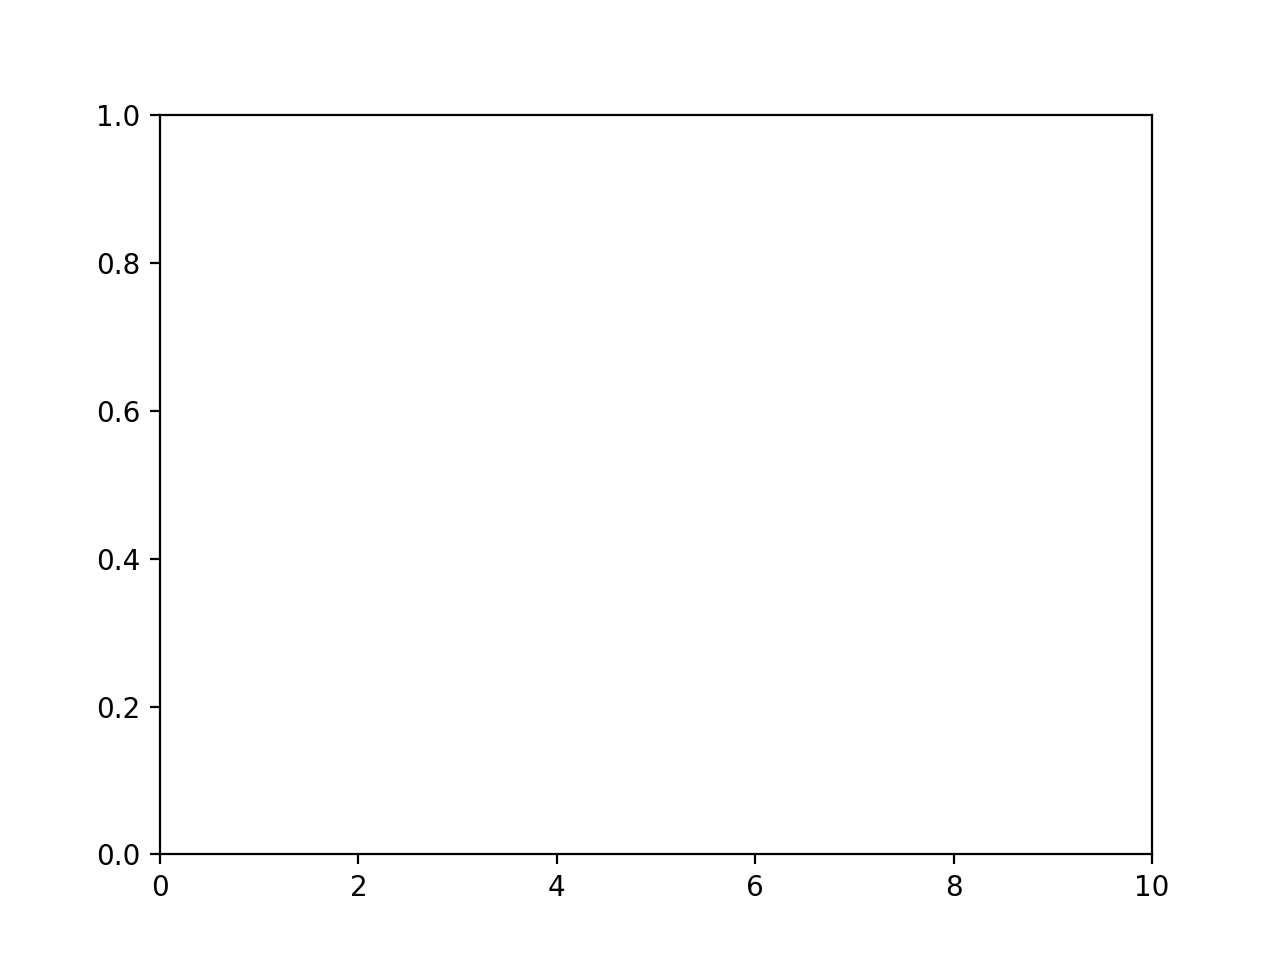

In [13]:
fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')
anim = []

def update(num, x, y, line, lab):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 10, 0, 1])
    return line,

# Animate the figures
for d in data:
    x_tmp, y_tmp, lab = d
    anim.append(ani.FuncAnimation(fig, update, len(x_tmp), fargs=[x_tmp, y_tmp, line, lab],
                              interval=400, blit=True))
    
# anim.save('test.mp4')
plt.show()

In [ ]:

x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    print(num)
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 10, 0, 1])
    if num >= 50:
        line.set_label('hi')
    else:
        line.set_label('hello')
    ax.legend()
    return line,

anim = ani.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=100, blit=True)
# anim.save('test.mp4')
plt.show()

In [ ]:
list(range(1,5))

In [ ]:
plt.figure()
x_beg = 0
for i in range(1,11):
    if i == 2:
        plt.plot(x[x_beg:(x_beg + i * 10)],
            np.concatenate([np.full(10, None), np.full(10, None)]),
            label = i)
    else:
        plt.plot(x[x_beg:(x_beg + i * 10)],
             y[x_beg:(x_beg + i * 10)],
             label=i)
    x_beg += i * 10
    
plt.legend(loc='best', fontsize=15)
# plt.savefig('test2.jpg')
plt.show()    

In [ ]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [ ]:
# https://stackoverflow.com/questions/21077477/animate-a-line-with-different-colors
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))

cmap = ListedColormap(['b', 'r', 'b'])
norm = BoundaryNorm([0, 1, 1.5, 2], cmap.N)

line = LineCollection([], cmap=cmap, norm=norm,lw=2)
line.set_array(np.linspace(0, 2, 1000))
ax.add_collection(line)

# initialization function: plot the background of each frame
def init():
    line.set_segments([])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    line.set_segments(segments)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
# anim = ani.FuncAnimation(fig, animate, init_func=init,
#                            frames=200, interval=20)

i = 2
x = np.linspace(0, 2, 1000)
y = np.sin(2 * np.pi * (x - 0.01 * i))
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
line

In [ ]:
#https://stackoverflow.com/questions/38768921/animated-plot-with-different-color-for-every-data-point
def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.01
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)

def get_colour(t):
    cmap = matplotlib.cm.get_cmap('Spectral')
    return cmap(t%1.)

def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)


fig, ax = plt.subplots()
ax.grid()

def run(data):

    # Get some data and plot
    t, y = data
    ax.scatter(t, y, c=get_colour(t))

    #Update axis
    xmin, xmax = ax.get_xlim()
    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()

anim = ani.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()